Historia połączeń dla numeru: +48 7B1zg4oZ9

# Jak odzyskać numery telefonu z bilingów oraz sprawdzić statystyki swoich połączeń telefonicznych z ostatniego roku?

Poniżej wczytano kawałek zbioru danych, czyli dane za jeden miesiącpołączeń telefonicznych dla mojego numeru. Z perspektywy dalszej analizy najważniejsze będą kolumny: Kierunek, rodzaj aktywności, data oraz numer telefonu. Dużym problemem dla analizy jest to, że wszystkie nie można uzyskać informacji na temat połączeń przychodzących.

Oczywiście nie można odzyskać numerów wprost jeżeli nie mamy ich zapisanych, ale możemy zobaczyć z jakimi numerami się najczęsciej łączyliśmy.

In [52]:
import pandas as pd 
calls = pd.read_csv("historia_polaczen_20190901-20190930.csv") 

Ukryto numery telefonów :) 

In [60]:
calls['Numery telefonu Hide']=calls['Numer telefonu'].str.slice(0,-7) + \
'xxxxx' +\
calls['Numer telefonu'].str.slice(-2,)
calls['Numery telefonu Hide'].head()

0      4879xxxxx92
1        60xxxxx20
2    Rozm. xxxxxh.
3      Nie xxxxxzy
4      4850xxxxx01
Name: Numery telefonu Hide, dtype: object

In [61]:
calls['Numer telefonu']=calls['Numery telefonu Hide']

In [62]:
calls.loc[calls['Numer telefonu'] == 'Nie xxxxxzy', ['Numer telefonu']] = 'Nie dotyczy'

In [63]:
calls.loc[calls['Numer telefonu'] == 'Rozm. xxxxxh.', ['Numer telefonu']] = 'Rozm. przych.'

In [64]:
calls=calls.iloc[:,0:-2]

In [59]:
calls.head()

,Lp.,Kierunek,Rodzaj aktywności,Data,Godzina,Numer telefonu,Opis,min./kB/szt.,Internet
0,1,Wychodzące,SMS,2019.09.30,22:23:11,4879xxxxx92,SMS,1 szt.,Połączenie bezpłatne
1,2,Wychodzące,Rozmowy głosowe,2019.09.30,21:27:43,60xxxxx20,GŁOSOWE,00:50 min.,Połączenie bezpłatne
2,3,Przychodzące,Rozmowy głosowe,2019.09.30,19:54:08,Rozm. przych.,DARMOWE PRZYCHODZĄCE POŁĄCZENIA GŁOSOWE,00:33 min.,NaN
3,4,Nie dotyczy,Dane,2019.09.30,18:41:47,Nie dotyczy,Transfer danych w strefie taniego internetu w ...,251188 kB,251200 kB
4,5,Wychodzące,SMS,2019.09.30,18:40:23,4850xxxxx01,SMS,1 szt.,Połączenie bezpłatne


In [13]:
calls.tail()

,Lp.,Kierunek,Rodzaj aktywności,Data,Godzina,Numer telefonu,Opis,min./kB/szt.,Internet
588,589,Wychodzące,SMS,2019.09.01,09:07:21,4851xxxxx56,SMS,1 szt.,Połączenie bezpłatne
589,590,Nie dotyczy,Dane,2019.09.01,08:56:50,Nie dotyczy,Transfer danych w strefie taniego internetu w ...,598032 kB,598100 kB
590,591,Wychodzące,SMS,2019.09.01,08:49:04,4866xxxxx10,SMS,1 szt.,Połączenie bezpłatne
591,592,Wychodzące,SMS,2019.09.01,00:20:51,4866xxxxx10,SMS,1 szt.,Połączenie bezpłatne
592,593,Wychodzące,SMS,2019.09.01,00:20:48,4866xxxxx10,SMS,1 szt.,Połączenie bezpłatne


Wczytano dane na razie za jeden miesiąc. Można łatwo sprawdzić, który numer był najczęściej używany.

In [65]:
calls['Numer telefonu'].value_counts().head(n=10)

Nie dotyczy      198
4866xxxxx10       75
4878xxxxx39       49
Rozm. przych.     40
4873xxxxx22       29
4872xxxxx05       28
4888xxxxx60       23
4879xxxxx92       18
4860xxxxx20       16
4873xxxxx01       14
Name: Numer telefonu, dtype: int64

In [66]:
calls.groupby([ 'Numer telefonu','Rodzaj aktywności']).count().sort_values(by=['Lp.'], ascending = False).head(n=10) #.transpose().plot()

,,Lp.,Kierunek,Data,Godzina,Opis,min./kB/szt.
Numer telefonu,Rodzaj aktywności,,,,,,
Nie dotyczy,Dane,198,198,198,198,198,198
4866xxxxx10,SMS,75,75,75,75,75,75
4878xxxxx39,SMS,48,48,48,48,48,48
Rozm. przych.,Rozmowy głosowe,40,40,40,40,40,40
4873xxxxx22,SMS,28,28,28,28,28,28
4872xxxxx05,SMS,27,27,27,27,27,27
4888xxxxx60,SMS,23,23,23,23,23,23
4879xxxxx92,SMS,18,18,18,18,18,18
4860xxxxx20,SMS,16,16,16,16,16,16


Poniżej sprawdzono aktywności dla wybranego numeru. Jest to numer do mojego kolegi Dawida. Zdecydowanie częściej kontaktowałem się z nim wieczorem:)

In [69]:
daw=calls[calls['Numer telefonu']=='4872xxxxx05'][['Rodzaj aktywności','Data','Godzina']].sort_values(by=['Data','Godzina'], ascending=True).transpose() 
daw#Dawid

,556,555,550,549,544,536,461,456,455,424,...,317,291,272,271,270,269,268,267,266,265
Rodzaj aktywności,SMS,SMS,SMS,SMS,SMS,SMS,SMS,SMS,SMS,SMS,...,SMS,SMS,SMS,SMS,SMS,SMS,SMS,SMS,Rozmowy głosowe,SMS
Data,2019.09.01,2019.09.01,2019.09.01,2019.09.01,2019.09.01,2019.09.01,2019.09.03,2019.09.04,2019.09.04,2019.09.05,...,2019.09.12,2019.09.14,2019.09.14,2019.09.14,2019.09.14,2019.09.14,2019.09.14,2019.09.14,2019.09.14,2019.09.14
Godzina,18:12:19,18:12:45,19:10:04,19:10:06,19:27:31,19:59:52,22:18:42,19:26:03,19:26:06,17:41:03,...,17:16:53,09:14:37,16:22:18,16:22:57,16:23:38,16:24:50,16:25:33,16:25:49,16:33:06,16:38:50


Poniżej sprawdzono aktywności dla wybranego numeru. Jest to numer do mojego kolegi Patryka.

In [71]:
calls[calls['Numer telefonu']=='4888xxxxx60'][['Rodzaj aktywności','Data','Godzina']].sort_values(by=['Data','Godzina'], ascending=True).transpose()
#Patryk

,395,394,393,392,391,379,365,364,363,362,...,289,288,159,158,157,155,154,153,152,151
Rodzaj aktywności,SMS,SMS,SMS,SMS,SMS,SMS,SMS,SMS,SMS,SMS,...,SMS,SMS,SMS,SMS,SMS,SMS,SMS,SMS,SMS,SMS
Data,2019.09.06,2019.09.06,2019.09.06,2019.09.06,2019.09.06,2019.09.07,2019.09.07,2019.09.07,2019.09.07,2019.09.07,...,2019.09.14,2019.09.14,2019.09.22,2019.09.22,2019.09.22,2019.09.22,2019.09.22,2019.09.22,2019.09.22,2019.09.22
Godzina,21:04:39,21:07:15,21:07:34,21:12:11,21:13:10,13:04:56,15:32:11,15:32:27,15:44:26,15:45:54,...,11:42:07,11:53:53,19:07:12,19:40:51,19:41:09,20:03:14,20:03:21,20:03:32,20:04:43,20:30:05


In [72]:
calls[calls['Numer telefonu']=='4873xxxxx01'] [['Rodzaj aktywności','Data','Godzina']].sort_values(by=['Data','Godzina'], ascending=True).transpose()
#

,562,561,560,300,146,145,144,143,82,80,58,57,56,55
Rodzaj aktywności,SMS,SMS,SMS,SMS,SMS,SMS,SMS,SMS,SMS,SMS,SMS,SMS,SMS,SMS
Data,2019.09.01,2019.09.01,2019.09.01,2019.09.13,2019.09.23,2019.09.23,2019.09.23,2019.09.23,2019.09.27,2019.09.27,2019.09.28,2019.09.28,2019.09.28,2019.09.28
Godzina,16:46:04,16:47:17,16:50:37,18:00:59,13:31:45,14:17:05,14:43:54,14:44:20,14:12:54,14:15:48,11:07:25,11:08:05,11:08:16,11:08:36


## Połączenia z całego roku

Wczytano bilinigi całego roku wstecz.

In [74]:
# calls1 = pd.read_csv("historia_polaczen_20190801-20190831.csv") 
# pd.concat([df1,df2])
calls2=pd.concat([
           pd.read_csv("historia_polaczen_20181101-20181130.csv",skiprows = 1, encoding = 'cp1250'),
           pd.read_csv("historia_polaczen_20181201-20181231.csv",skiprows = 1, encoding = 'cp1250'),
           pd.read_csv("historia_polaczen_20190101-20190131.csv",skiprows = 1, encoding = 'cp1250'),
           pd.read_csv("historia_polaczen_20190201-20190228.csv",skiprows = 1, encoding = 'cp1250'),
           pd.read_csv("historia_polaczen_20190301-20190331.csv",skiprows = 1, encoding = 'cp1250'),
           pd.read_csv("historia_polaczen_20190401-20190430.csv",skiprows = 1, encoding = 'cp1250'),
           pd.read_csv("historia_polaczen_20190501-20190531.csv",skiprows = 1, encoding = 'cp1250'),
           pd.read_csv("historia_polaczen_20190601-20190630.csv",skiprows = 1, encoding = 'cp1250'),
           pd.read_csv("historia_polaczen_20190701-20190731.csv",skiprows = 1, encoding = 'cp1250'),
           pd.read_csv("historia_polaczen_20190801-20190831.csv",skiprows = 1, encoding = 'cp1250')[['Lp.',
 'Kierunek',
 'Rodzaj aktywności',
 'Data',
 'Godzina',
 'Numer telefonu',
 'Opis',
 'min./kB/szt.',
 'Internet',
 'Unnamed: 10']],
           calls
          ],sort=False)[['Lp.',
 'Kierunek',
 'Rodzaj aktywności',
 'Data',
 'Godzina',
 'Numer telefonu',
 'Opis',
 'min./kB/szt.',
 'Internet']]


calls2['Numery telefonu Hide']=calls2['Numer telefonu'].str.slice(0,-7) + \
'xxxxx' +\
calls2['Numer telefonu'].str.slice(-2,)

calls2['Numer telefonu']=calls2['Numery telefonu Hide']
calls.loc[calls['Numer telefonu'] == 'Nie xxxxxzy', ['Numer telefonu']] = 'Nie dotyczy'
calls.loc[calls['Numer telefonu'] == 'Rozm. xxxxxh.', ['Numer telefonu']] = 'Rozm. przych.'
calls2=calls2.iloc[:,0:-2]



calls2.head()

,Lp.,Kierunek,Rodzaj aktywności,Data,Godzina,Numer telefonu,Opis,min./kB/szt.
0,1,Wychodzące,SMS,2018.11.30,21:58:45,4869xxxxx99,SMS,1 szt.
1,2,Nie dotyczy,Dane,2018.11.30,21:37:04,Nie xxxxxzy,Transfer danych w strefie taniego internetu w ...,2726 kB
2,3,Wychodzące,SMS,2018.11.30,21:23:17,4869xxxxx99,SMS,1 szt.
3,4,Wychodzące,SMS,2018.11.30,21:05:27,4873xxxxx63,SMS,1 szt.
4,5,Nie dotyczy,Dane,2018.11.30,19:53:46,Nie xxxxxzy,Transfer danych w strefie taniego internetu w ...,87 kB


In [75]:
calls2.tail()

,Lp.,Kierunek,Rodzaj aktywności,Data,Godzina,Numer telefonu,Opis,min./kB/szt.
588,589,Wychodzące,SMS,2019.09.01,09:07:21,4851xxxxx56,SMS,1 szt.
589,590,Nie dotyczy,Dane,2019.09.01,08:56:50,Nie xxxxxzy,Transfer danych w strefie taniego internetu w ...,598032 kB
590,591,Wychodzące,SMS,2019.09.01,08:49:04,4866xxxxx10,SMS,1 szt.
591,592,Wychodzące,SMS,2019.09.01,00:20:51,4866xxxxx10,SMS,1 szt.
592,593,Wychodzące,SMS,2019.09.01,00:20:48,4866xxxxx10,SMS,1 szt.


In [76]:
calls2['Numer telefonu'].value_counts().head(n=30)

Nie xxxxxzy      2412
Rozm. xxxxxh.     650
4878xxxxx39       596
4873xxxxx22       463
4888xxxxx12       260
4869xxxxx99       239
4879xxxxx00       239
4872xxxxx05       218
4873xxxxx43       178
4879xxxxx92       176
4866xxxxx10       160
4851xxxxx56       145
4873xxxxx01       133
4853xxxxx13       103
4850xxxxx01        97
4850xxxxx62        78
4857xxxxx36        61
4873xxxxx11        61
4860xxxxx20        54
4888xxxxx60        53
88xxxxx12          52
4850xxxxx15        46
60xxxxx20          45
4878xxxxx35        42
4850xxxxx35        40
4857xxxxx93        39
4860xxxxx51        38
4888xxxxx92        32
4853xxxxx85        30
4851xxxxx80        30
Name: Numer telefonu, dtype: int64

In [77]:
calls3=calls2[['Rodzaj aktywności','Numer telefonu','Kierunek']].groupby(['Numer telefonu','Rodzaj aktywności']).count().iloc[:,0:2].reset_index(level=['Numer telefonu', 'Rodzaj aktywności']) #.transpose().plot()
# cols = [col for col in calls1.columns if col not in ['Kwota poza abonamentem (Brutto)']]
# calls3.head()

In [78]:
 calls3.dtypes

Numer telefonu       object
Rodzaj aktywności    object
Kierunek              int64
dtype: object

In [80]:
calls3[(calls3['Kierunek']>10) & (~calls3['Numer telefonu'].isin(['Nie dotyczy','Rozm. przych.']))].sort_values(by=['Kierunek'], ascending = False).head(n=15)
# calls3

,Numer telefonu,Rodzaj aktywności,Kierunek
166,Nie xxxxxzy,Dane,2412
167,Rozm. xxxxxh.,Rozmowy głosowe,650
118,4878xxxxx39,SMS,558
107,4873xxxxx22,SMS,427
129,4888xxxxx12,SMS,259
120,4879xxxxx00,Rozmowy głosowe,239
93,4869xxxxx99,SMS,223
97,4872xxxxx05,SMS,191
127,4879xxxxx92,SMS,176
83,4866xxxxx10,SMS,160


In [81]:
calls4=calls2
calls4['Rok'] = pd.DatetimeIndex(calls4['Data']).year
calls4['Miesiąc'] = pd.DatetimeIndex(calls4['Data']).month
calls4['Rok, miesiąc']=calls4['Rok'].astype(str)+', '+calls4['Miesiąc'].astype(str)
# calls4['Rok miesiąc']= pd.to_string(calls4['Rok'])+ ', ' +calls4['Miesiąc']
calls4=calls4[['Rok, miesiąc','Kierunek']].groupby(['Rok, miesiąc',]).count().iloc[:,0:3].reset_index(level=['Rok, miesiąc']) #.transpose().plot()
calls4=calls4[(calls4['Kierunek']>1)].sort_values(by=['Rok, miesiąc'], ascending = True)
calls4.columns=['Rok, miesiąc', 'Liczba aktywności']
calls4.head(n=10)

,"Rok, miesiąc",Liczba aktywności
0,"2018, 11",302
1,"2018, 12",881
2,"2019, 1",840
3,"2019, 2",558
4,"2019, 3",707
5,"2019, 4",540
6,"2019, 5",549
7,"2019, 6",578
8,"2019, 7",615
9,"2019, 8",1022


Najbardziej aktywnie używałem telefonu w sierpniu 2019 r.

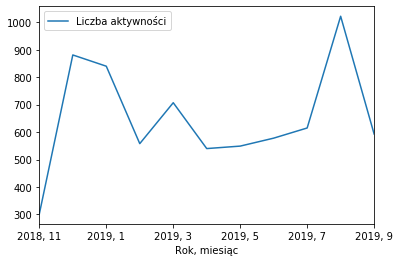

In [82]:
calls4.plot(x='Rok, miesiąc', y='Liczba aktywności')


Poniżej widać w jaki sposób używałem telefonu w poszczególnych miesiącach.

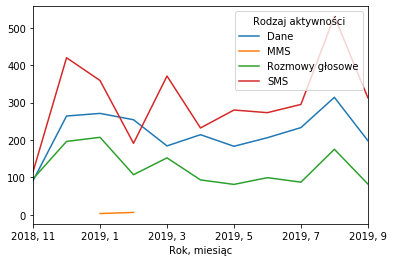

In [84]:
calls4=calls2
calls4['Rok'] = pd.DatetimeIndex(calls4['Data']).year
calls4['Miesiąc'] = pd.DatetimeIndex(calls4['Data']).month
calls4['Rok, miesiąc']=calls4['Rok'].astype(str)+', '+calls4['Miesiąc'].astype(str)
# calls4['Rok miesiąc']= pd.to_string(calls4['Rok'])+ ', ' +calls4['Miesiąc']
calls4=calls4[['Rok, miesiąc','Rodzaj aktywności','Kierunek']].groupby(['Rok, miesiąc','Rodzaj aktywności']).count().iloc[:,0:3].reset_index(level=['Rok, miesiąc','Rodzaj aktywności']) #.transpose().plot()
calls4=calls4[(calls4['Kierunek']>1)].sort_values(by=['Rok, miesiąc'], ascending = True)
calls4.columns=['Rok, miesiąc','Rodzaj aktywności', 'Liczba aktywności']
df = calls4.pivot(index='Rok, miesiąc', columns='Rodzaj aktywności', values='Liczba aktywności')

df.plot()